https://www.kaggle.com/datasets/arejet/simple-linear-regression/metadata

In [207]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [208]:
df = pd.read_csv('kc_house_data.csv')
df.info()
df = df[['price', 'bedrooms', 'sqft_living', 'bathrooms', 'grade', 'sqft_above']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [209]:
df.describe()

,price,bedrooms,sqft_living,bathrooms,grade,sqft_above
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2079.899736,2.114757,7.656873,1788.390691
std,3.671272e+05,0.930062,918.440897,0.770163,1.175459,828.090978
min,7.500000e+04,0.000000,290.000000,0.000000,1.000000,290.000000
25%,3.219500e+05,3.000000,1427.000000,1.750000,7.000000,1190.000000
50%,4.500000e+05,3.000000,1910.000000,2.250000,7.000000,1560.000000
75%,6.450000e+05,4.000000,2550.000000,2.500000,8.000000,2210.000000
max,7.700000e+06,33.000000,13540.000000,8.000000,13.000000,9410.000000


In [210]:
df = df.sample(frac = 1)

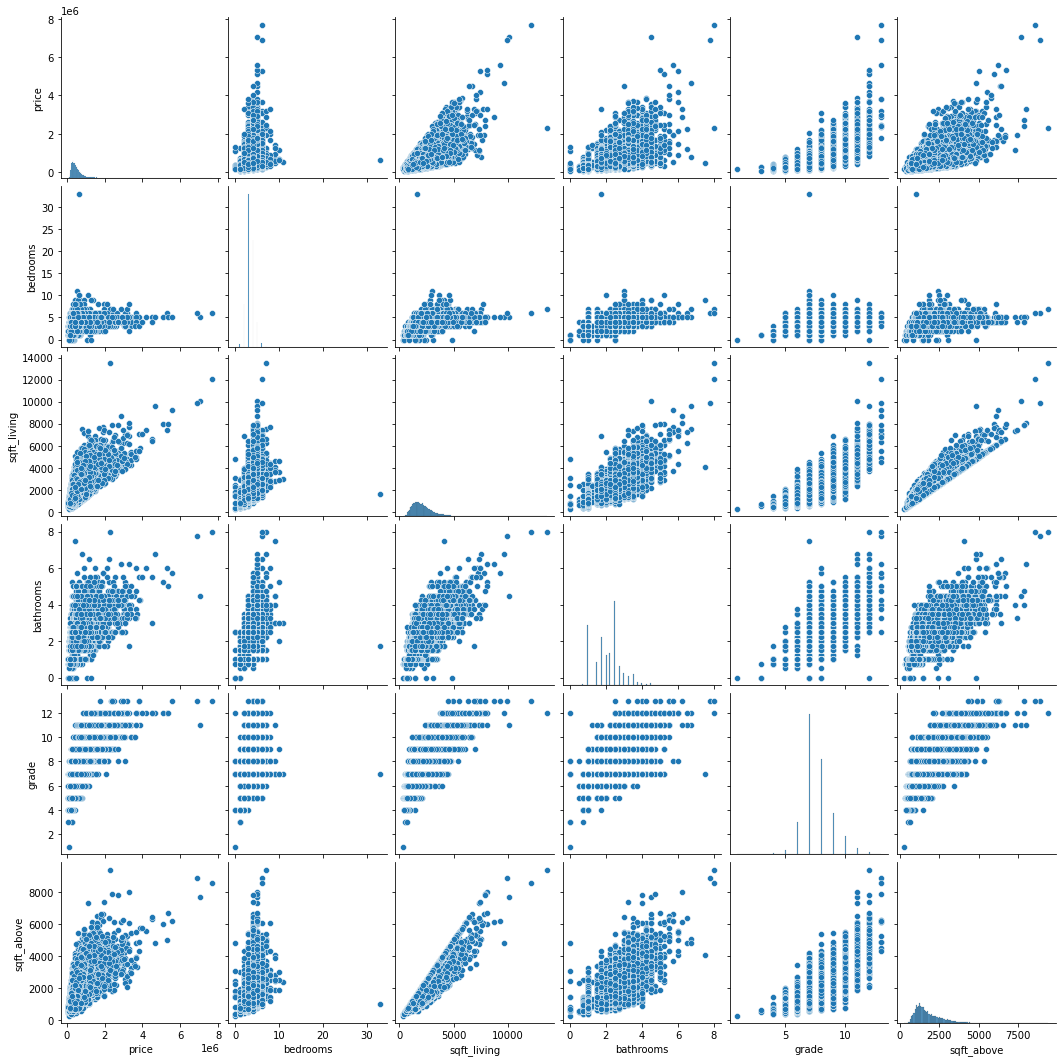

In [211]:
sns.pairplot(df)

<AxesSubplot:>

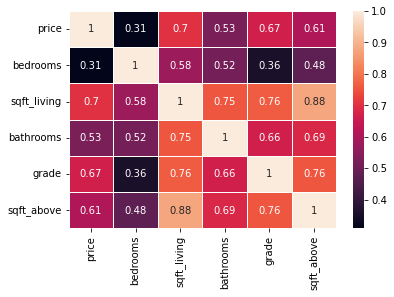

In [212]:
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

In [213]:
x = df[['sqft_living', 'bathrooms', 'bedrooms', 'grade', 'sqft_above']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [214]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [215]:
print("Intercept: ", lm.intercept_)
print(lm.coef_)

print("sqft_living coefficient : ", lm.coef_[0])
print("bathrooms coefficient : ", lm.coef_[1])
print("bedrooms coefficient : ", lm.coef_[2])
print("grade coefficient : ", lm.coef_[3])
print("sqft_above coefficient : ", lm.coef_[4])

Intercept:  -526817.1166822265
[ 2.80928630e+02 -2.24831972e+04 -4.21293240e+04  1.05576689e+05
 -7.67048602e+01]
sqft_living coefficient :  280.9286301558291
bathrooms coefficient :  -22483.197161996995
bedrooms coefficient :  -42129.324006879244
grade coefficient :  105576.68914117856
sqft_above coefficient :  -76.70486021219767


Text(0, 0.5, 'Predicted values')

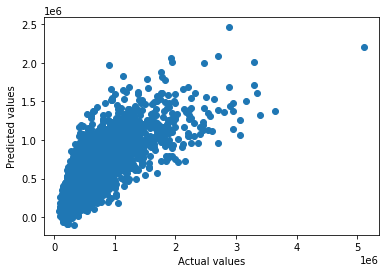

In [216]:
y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [217]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.544601168513028
R2 score :  0.5445217646477342
MSE:  57592230394.00143


In [218]:
y_pred = lm.predict(x_test)

In [219]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print("Variance: ", vari)
print("R2 score: ", r2score)
print('MSE: ', mse)

Variance:  0.544601168513028
R2 score:  0.5445217646477342
MSE:  57592230394.00143


Text(0, 0.5, 'Predicted values')

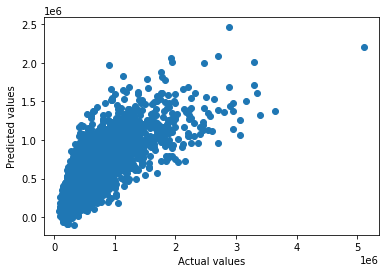

In [220]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")